# Sample code: connect to CAS using the SWAT package

In [99]:
!ls -lah /shared-data/csvdata/



total 282M
drwxrwsr-x. 3 jovyan jovyan 4.0K May  3 08:54  .
drwxrwsr-x. 8   1000 jovyan  136 May  3 08:07  ..
-rw-rw-r--. 1 jovyan jovyan  977 May  3 07:15  ah_cda_entry.csv
-rw-rw-r--. 1 jovyan jovyan  30M May  3 07:15  ah_cda_measure.csv.gz
-rw-rw-r--. 1 jovyan jovyan 1.3K May  3 07:18  ah_cda_measure_types.csv
-rw-rw-r--. 1 jovyan jovyan 8.8M May  3 07:18  ah_instantaneousbeatsperminute.csv.gz
-rw-rw-r--. 1 jovyan jovyan 183M May  3 07:34  ah_quantitytype.csv.gz
-rw-rw-r--. 1 jovyan jovyan 670K May  3 07:34  ah_workoutdata.csv
-rw-rw-r--. 1 jovyan jovyan 774K May  3 07:34  ah_workoutevent.csv
-rw-rw-r--. 1 jovyan jovyan  210 May  3 07:34  beat_ah_bloodglucos_periods.csv
-rw-rw-r--. 1 jovyan jovyan  295 May  3 08:05  beat_ah_periods.csv
-rw-rw-r--. 1 jovyan jovyan  22K May  3 08:05  beat_ah_quantitytype_periods.csv
-rw-rw-r--. 1 jovyan jovyan 7.7K May  3 08:05  beat_basedata.csv
-rw-rw-r--. 1 jovyan jovyan  133 May  3 08:05  beat_carelink_periods.csv
-rw-rw-r--. 1 jovyan jovyan 1.6K 

In [10]:
import swat

Note that we need to pass the CAS certificate in the constructor call!

In [79]:
# make sure to change the password
# 5@tur@te
#sess = swat.CAS("controller.sas-cas-server-default.viya4.svc.cluster.local", 5570, "sasadm", "<yourpassword>", ssl_ca_list="/shared-data/pythondata/certs/trustedcerts.pem")
sess = swat.CAS("controller.sas-cas-server-default.viya4.svc.cluster.local", 5570, "sasadm", "5@tur@te", ssl_ca_list="/shared-data/pythondata/certs/trustedcerts.pem")

print(sess)

CAS('controller.sas-cas-server-default.viya4.svc.cluster.local', 5570, 'sasadm', protocol='cas', name='py-session-3', session='09ad6b12-ae74-3f43-bfed-2d55b69ab5aa')


In [80]:
out = sess.serverstatus()
print(out)

NOTE: Grid node action status report: 1 nodes, 8 total actions executed.
[About]

 {'CAS': 'Cloud Analytic Services',
  'Version': '4.00',
  'VersionLong': 'V.04.00M0P02142022',
  'Viya Release': '20220319.1647650546857',
  'Viya Version': 'Stable 2021.2.4',
  'Copyright': 'Copyright © 2014-2022 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2022-05-02T20:13:27Z',
  'System': {'Hostname': 'controller.sas-cas-server-default.viya4.svc.cluster.local',
   'OS Name': 'Linux',
   'OS Family': 'LIN X64',
   'OS Release': '4.18.0-348.7.1.el8_5.x86_64',
   'OS Version': '#1 SMP Wed Dec 22 13:25:12 UTC 2021',
   'Model Number': 'x86_64',
   'Linux Distribution': 'Red Hat Enterprise Linux release 8.5 (Ootpa)'},
  'license': {'site': 'CIS COMPUTE CLOUD SERVICES - VDSD TRAILS - HACK',
   'siteNum': 70180938,
   'expires': '03Jan2023:00:00:00',
   'gracePeriod': 45,
   'warningPeriod': 46},
  'CASHostAccountRequired': 'OPTIONAL',
  'Transferred': 'NO'}

[server]

 Server Status
 
    nod

In [94]:
df = sess.CASTable('diasend_cgm', caslib='CASData')

# .to_frame() konverterar från SAS tabell till python tabell. Måste göras för att använda python
df = df.to_frame()
print(df.shape)
df.head()



(415927, 3)


,bd_id,mmolL,time_dt
0,000,13.2,2022-01-14 10:50:00
1,000,14.8,2022-01-14 11:05:00
2,000,15.4,2022-01-14 11:20:00
3,000,15.8,2022-01-14 11:35:00
4,000,16.1,2022-01-14 11:50:00


<AxesSubplot:>

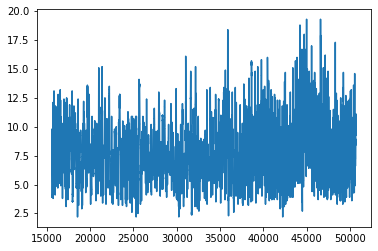

In [38]:
df.loc[df_py["bd_id"]=="013","mmolL"].plot()


In [40]:
df.bd_id.unique()

array(['000', '008', '013', '015', '017', '021', '027', '029', '043',
       '044', '047', '049', '058', '063', '066', '079', '080', '081',
       '092', '106', '105', '117', '055', '009', '011', '076'],
      dtype=object)

In [46]:
df2 = sess.CASTable('diasend_insulin', caslib='CASData')

# .to_frame() konverterar från SAS tabell till python tabell. Måste göras för att använda python
df2 = df2.to_frame()
print(df2.shape)
df2.head()


(19417, 12)


,bd_id,Basalmängd (U/h),Bolustyp,Bolusvolym (U),Förlängd volym (U),Längd (min),Kolhydrater(g),Anteckningar,"Daglig dos, totalt","Daglig basal, totalt",Omedelbar volym (U),time_dt
0,013,1.300,,NaN,,NaN,NaN,,NaN,NaN,NaN,2022-01-07 21:58:00
1,013,NaN,Normal,1.0,,NaN,NaN,,NaN,NaN,NaN,2022-01-07 22:00:00
2,013,1.597,,NaN,,NaN,NaN,,NaN,NaN,NaN,2022-01-07 22:23:00
3,013,1.950,,NaN,,NaN,NaN,,NaN,NaN,NaN,2022-01-07 22:28:00
4,013,2.103,,NaN,,NaN,NaN,,NaN,NaN,NaN,2022-01-07 22:33:00


In [43]:
df2["Bolustyp"].unique()
df2["Kolhydrater(g)"].unique()


array([nan, 32., 30., 50., 10., 28., 15., 25., 60., 13., 20., 40.,  6.,
       24., 26.,  5.,  1., 16., 35., 45.,  2., 42., 12.,  8., 18., 39.,
        4., 51., 34., 67., 49., 48., 46., 36., 33., 53., 61., 77., 54.,
       57., 65., 55., 44.])

In [32]:
df2.bd_id.unique()


array(['013', '080', '106'], dtype=object)

In [33]:
df2.groupby("bd_id").count()


,Basalmängd (U/h),Bolustyp,Bolusvolym (U),Förlängd volym (U),Längd (min),Kolhydrater(g),Anteckningar,"Daglig dos, totalt","Daglig basal, totalt",Omedelbar volym (U),time_dt
Fetch,,,,,,,,,,,
013,4783,5444,412,5444,4,213,5444,36,36,0,5444
080,3597,4960,1209,4960,0,1,4960,153,153,0,4960
106,3970,9013,4151,9013,3,56,9013,836,836,3,9013


In [37]:
df.groupby("bd_id").count()


,mmolL,time_dt
Fetch,,
000,9463,9463
008,6118,6118
009,2613,2613
011,1238,1238
013,35122,35122
015,29423,29423
017,7769,7769
021,2746,2746
027,29262,29262


In [82]:
#df3 = sess.CASTable('ah_cda_measure_types', caslib='CASData')
#df3 = sess.CASTable('carelink_rawdata', caslib='CASData')
#df3 = sess.CASTable('carelink', caslib='CASData')
df3 = sess.CASTable('clarity', caslib='CASData')



# .to_frame() konverterar från SAS tabell till python tabell. Måste göras för att använda python
df3 = df3.to_frame()
print(df3.shape)
df3.head()


(100569, 15)


,bd_id,Index,Timestamp(YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value,Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change,Transmitter Time (Long Integer),Transmitter ID
0,003,1.0,NaT,Förnamn,,,,,,,,NaT,NaN,NaN,
1,003,2.0,NaT,Efternamn,,,,,,,,NaT,NaN,NaN,
2,003,3.0,NaT,Enhet,,,Dexcom G6 Mobile App,iPhone G6,,,,NaT,NaN,NaN,
3,003,4.0,NaT,Varning,Fall,,,iPhone G6,,,,NaT,NaN,NaN,
4,003,5.0,NaT,Varning,Hög,,,iPhone G6,10,,,NaT,NaN,NaN,


In [59]:
print(df3.bd_id.unique())
df3.tail(20)


['003' '078' '082' '101']


,bd_id,Index,Timestamp(YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value,Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change,Transmitter Time (Long Integer),Transmitter ID
100549,101,24820.0,2022-04-10 16:00:56,EGV,,,,Android G,"6,5",,,NaT,NaN,NaN,
100550,101,24821.0,2022-04-10 16:05:56,EGV,,,,Android G,"6,6",,,NaT,NaN,NaN,
100551,101,24822.0,2022-04-10 16:10:56,EGV,,,,Android G,"6,7",,,NaT,NaN,NaN,
100552,101,24823.0,2022-04-10 16:15:56,EGV,,,,Android G,"6,7",,,NaT,NaN,NaN,
100553,101,24824.0,2022-04-10 16:20:56,EGV,,,,Android G,"6,7",,,NaT,NaN,NaN,
100554,101,24825.0,2022-04-10 16:25:56,EGV,,,,Android G,"6,7",,,NaT,NaN,NaN,
100555,101,24826.0,2022-04-10 16:30:56,EGV,,,,Android G,"6,6",,,NaT,NaN,NaN,
100556,101,24827.0,2022-04-10 16:35:56,EGV,,,,Android G,"6,5",,,NaT,NaN,NaN,
100557,101,24828.0,2022-04-10 16:40:56,EGV,,,,Android G,"6,3",,,NaT,NaN,NaN,
100558,101,24829.0,2022-04-10 16:45:56,EGV,,,,Android G,"6,2",,,NaT,NaN,NaN,


In [76]:
import numpy as np
#df3["Carb Value (grams)"] = df3["Carb Value (grams)"].apply(lambda s: np.nan if s=="" else float(s))
df3["Glucose Value"].value_counts()

4,9     1794
4,8     1787
5,4     1726
5,3     1714
5,2     1699
        ... 
13.6       1
13.1       1
15.0       1
14,6       1
16.4       1
Name: Fetch, Length: 266, dtype: int64

In [77]:
df3.groupby("bd_id").count()
df3["Insulin Value (u)"].value_counts()

    100569
Name: Fetch, dtype: int64

In [85]:
df4 = sess.CASTable('ah_workoutdata', caslib='CASData').to_frame()
print(df4.shape)
df4.head()


(4846, 11)


,bd_id,WorkoutID,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit,startDate,endDate
0,003,1.0,HKWorkoutActivityTypeWalking,47.919571,min,2.316753,km,127.295,kcal,2018-08-26 13:13:37,2018-08-26 14:01:32
1,003,2.0,HKWorkoutActivityTypeWalking,42.632349,min,2.273320,km,112.341,kcal,2018-08-30 11:51:00,2018-08-30 12:33:38
2,003,3.0,HKWorkoutActivityTypeDance,37.225442,min,0.000000,km,244.210,kcal,2018-08-30 18:49:32,2018-08-30 19:26:46
3,003,4.0,HKWorkoutActivityTypeWalking,38.084572,min,3.075670,km,128.115,kcal,2018-09-01 20:20:11,2018-09-01 20:58:16
4,003,5.0,HKWorkoutActivityTypeWalking,26.486400,min,2.567432,km,115.608,kcal,2018-09-03 12:18:50,2018-09-03 12:45:19


In [88]:
df4["bd_id"].value_counts()


078    1225
003    1103
025    1007
029     991
058     403
055      54
047      45
016      18
Name: Fetch, dtype: int64

In [89]:
df4["workoutActivityType"].value_counts()



HKWorkoutActivityTypeCycling                          2127
HKWorkoutActivityTypeWalking                          1144
HKWorkoutActivityTypeRunning                           859
HKWorkoutActivityTypeStairClimbing                     161
HKWorkoutActivityTypeOther                             155
HKWorkoutActivityTypeTraditionalStrengthTraining       134
HKWorkoutActivityTypeElliptical                         60
HKWorkoutActivityTypeCrossTraining                      49
HKWorkoutActivityTypeHiking                             35
HKWorkoutActivityTypeCrossCountrySkiing                 24
HKWorkoutActivityTypeSkatingSports                      18
HKWorkoutActivityTypeSnowSports                         16
HKWorkoutActivityTypeHighIntensityIntervalTraining      12
HKWorkoutActivityTypeRowing                             12
HKWorkoutActivityTypeSwimming                           11
HKWorkoutActivityTypePaddleSports                       11
HKWorkoutActivityTypeTennis                             

In [92]:
df5 = sess.CASTable('ah_cda_measure', caslib='CASData').to_frame()
print(df5["bd_id"].value_counts())
print(df5.shape)
df5.head()


025    509306
078    407046
003    377194
055    147166
016    143433
029    116604
058     80640
026     23429
039       254
Name: Fetch, dtype: int64
(1805072, 17)


,bd_id,entryID,MeasureID,observation_classCode,observation_moodCode,SNOMED_CODE,SNOMED_CODENAME,value,type,unit,statusCode,effectiveTimeLow,effectiveTimeHigh,value_type,value_value,value_unit,interpretationCode_code
0,003,1.0,1.0,OBS,EVN,39156-5,Body mass index,35.4,HKQuantityTypeIdentifierBodyMassIndex,count,completed,20201203124908+0200,20201203124908+0200,PQ,35.4,count,N
1,003,1.0,2.0,OBS,EVN,39156-5,Body mass index,37.9,HKQuantityTypeIdentifierBodyMassIndex,count,completed,20211018082504+0200,20211018082504+0200,PQ,37.9,count,N
2,003,1.0,3.0,OBS,EVN,39156-5,Body mass index,37.6,HKQuantityTypeIdentifierBodyMassIndex,count,completed,20211103093904+0200,20211103093904+0200,PQ,37.6,count,N
3,003,1.0,4.0,OBS,EVN,39156-5,Body mass index,37.5,HKQuantityTypeIdentifierBodyMassIndex,count,completed,20211115104615+0200,20211115104615+0200,PQ,37.5,count,N
4,003,1.0,5.0,OBS,EVN,39156-5,Body mass index,37.7,HKQuantityTypeIdentifierBodyMassIndex,count,completed,20211123114724+0200,20211123114724+0200,PQ,37.7,count,N


In [93]:
df5["SNOMED_CODENAME"].value_counts()

Blood glucose level         1106801
Heart rate                   692997
Respiratory rate               4751
Oral fluid input                273
Body weight Measured            196
Height                           19
Body mass index                  15
Systolic blood pressure           9
Diastolic blood pressure          9
Body Temperature                  2
Name: Fetch, dtype: int64

In [8]:
sess.caslibinfo(caslib='CASData')

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASData,PATH,,/shared-data/casdata/,,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
1+2

In [6]:
sess.terminate()